# CS559 Project

#### Importing and Scaling Dataset

In [16]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

#loading the dataset
train_file_path = 'train_data.csv'
test_file_path = 'test_data.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

#separating features
X_train = train_data.drop(columns=['Index', 'Bankrupt?'])
y_train = train_data['Bankrupt?']
X_test = test_data.drop(columns=['Index'])
test_index = test_data['Index']

#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_data.head()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,...,0.780554,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464
1,1,0,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,...,0.819963,0.005968,0.624171,0.605690,0.841869,0.279040,0.026801,0.565205,1,0.032442
2,2,0,0.571150,0.620148,0.624177,0.612275,0.612282,0.999163,0.797654,0.809533,...,0.839128,0.006022,0.625306,0.612271,0.843294,0.278927,0.026816,0.565276,1,0.033034
3,3,0,0.483401,0.556694,0.536164,0.602445,0.602445,0.999035,0.797458,0.809380,...,0.806477,0.002177,0.621610,0.602444,0.841891,0.293391,0.027063,0.566190,1,0.015406
4,4,0,0.510359,0.537287,0.552546,0.600023,0.600023,0.999009,0.797406,0.809313,...,0.799277,0.001124,0.623993,0.600019,0.840313,0.279878,0.026880,0.565549,1,0.028858


In [17]:
test_data.head()

,Index,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0.414323,0.481029,0.468280,0.609514,0.609514,0.998889,0.797159,0.809132,0.303290,...,0.761704,0.001404,0.623973,0.609512,0.838286,0.275450,0.026749,0.564950,1,0.136203
1,1,0.497441,0.560892,0.546603,0.610660,0.610660,0.999108,0.797545,0.809431,0.303506,...,0.815244,0.004466,0.623724,0.610658,0.842427,0.285886,0.026965,0.565870,1,0.018871
2,2,0.501584,0.548899,0.556721,0.606134,0.606134,0.999034,0.797427,0.809370,0.303453,...,0.806318,0.000684,0.625387,0.606132,0.840598,0.275816,0.026793,0.565165,1,0.095511
3,3,0.574465,0.637375,0.619680,0.600376,0.600376,0.999030,0.797528,0.809426,0.303640,...,0.852655,0.001718,0.624151,0.600375,0.844727,0.279977,0.026795,0.565178,1,0.028513
4,4,0.393360,0.456444,0.440334,0.600009,0.600009,0.998800,0.797025,0.809000,0.303240,...,0.741604,0.002545,0.623612,0.600009,0.835578,0.279901,0.026623,0.564204,1,0.028779


#### Checking Assumptions

In [18]:
#function to calculate VIF and check assumptions
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif = calculate_vif(pd.DataFrame(X_train_scaled, columns=X_train.columns))
print(vif)

C:\Users\wheel\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                            variables           VIF
0    ROA(C) before interest and depreciation befor...  7.063760e+01
1              ROA(A) before interest and % after tax  5.067655e+01
2    ROA(B) before interest and depreciation after...  1.071441e+02
3                              Operating Gross Margin  7.183786e+07
4                         Realized Sales Gross Margin  1.097341e+03
..                                                ...           ...
90                                Liability to Equity  4.656354e+02
91                 Degree of Financial Leverage (DFL)  1.010536e+00
92   Interest Coverage Ratio (Interest expense to ...  1.011676e+00
93                                    Net Income Flag           NaN
94                                Equity to Liability  3.251059e+00

[95 rows x 2 columns]


C:\Users\wheel\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


#### Handling Class Imbalance and Model Initialization

In [19]:
#handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

#defining number of folds in cross-validation
k_values = range(3, 11)

#listing base models
base_models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(probability=True) 
]

#### Bias^2 and Variance Function

In [20]:
def bias_variance_decomposition(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X[train_index], X[test_index]
        y_train_kf, y_test_kf = y[train_index], y[test_index]
        
        model.fit(X_train_kf, y_train_kf)
        y_pred = model.predict(X_test_kf)
        
        y_true_all.append(y_test_kf)
        y_pred_all.append(y_pred)
    
    y_true_all = np.concatenate(y_true_all)
    y_pred_all = np.concatenate(y_pred_all)
    
    #calculating bias^2
    bias_squared = np.mean((y_true_all - np.mean(y_pred_all))**2)

    #calculating variance
    variance = np.mean((y_pred_all - np.mean(y_pred_all))**2)
    
    return bias_squared, variance

#### Model Combination and Evaluation

In [21]:
#generating all base model combinations
model_combinations = sum([list(combinations(base_models, i)) for i in range(1, len(base_models)+1)], [])

best_model_combination = None
best_accuracy = 0
best_bias_variance_score = float('inf')
results = []

#evaluating each combination of models
for model_comb in model_combinations:
    estimators = [(f'model_{i}', model) for i, model in enumerate(model_comb)]
    #creating stacking model and logistic regression meta-learner
    stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))
    
    #preforming cross-validation and obtaining mean accuracy
    scores = cross_val_score(stacking_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    
    #calculating bias^2 and variance
    bias_squared, variance = bias_variance_decomposition(stacking_model, X_resampled, y_resampled)
    
    print(f'Models={estimators}, Mean Accuracy={mean_accuracy}, Bias^2={bias_squared}, Variance={variance}, Bias^2 + Variance: {bias_squared + variance}')
    #updating results for plotting
    results.append({
        'Model Combination': str([model.__class__.__name__ for model in model_comb]),
        'Mean Accuracy': np.float64(mean_accuracy),
        'Bias^2': np.float64(bias_squared),
        'Variance': np.float64(variance),
        'Bias^2 + Variance': np.float64(bias_variance_score)
    })
    
    #updating best model
    bias_variance_score = bias_squared + variance
    if bias_variance_score < best_bias_variance_score:
        best_accuracy = mean_accuracy
        best_bias_variance_score = bias_variance_score
        best_model_combination = model_comb
    elif bias_variance_score == best_bias_variance_score:
        #if the bias_variance_score is the same, compare accuracy
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_model_combination = model_comb

print(f'Accuracy: {best_accuracy}')
print(f'Best model combination:', [(f'model_{i}', model.__class__.__name__) for i, model in enumerate(best_model_combination)])
print(f'Bias^2 + Variance: {best_bias_variance_score}')

#training best model combination on entire resampled training set
best_estimators = [(f'model_{i}', model) for i, model in enumerate(best_model_combination)]
final_model = StackingClassifier(estimators=best_estimators, final_estimator=LogisticRegression(max_iter=1000))
final_model.fit(X_resampled, y_resampled)

#making predictions on test set
test_predictions = final_model.predict(X_test_scaled)

submission = pd.DataFrame({
    'Index': test_index,
    'Bankrupt?': test_predictions
})

submission.to_csv('submission.csv', index=False)

Models=[('model_0', LogisticRegression(max_iter=1000))], Mean Accuracy=0.8957047594298124, Bias^2=0.25019338301429, Variance=0.24980661698570994, Bias^2 + Variance: 0.49999999999999994
Models=[('model_0', DecisionTreeClassifier())], Mean Accuracy=0.9548054434354295, Bias^2=0.25019587023008033, Variance=0.24980412976991972, Bias^2 + Variance: 0.5
Models=[('model_0', RandomForestClassifier())], Mean Accuracy=0.9850242743715247, Bias^2=0.25004119401487834, Variance=0.24995880598512163, Bias^2 + Variance: 0.5
Models=[('model_0', GradientBoostingClassifier())], Mean Accuracy=0.959352010572802, Bias^2=0.25021897034606244, Variance=0.24978102965393756, Bias^2 + Variance: 0.5
Models=[('model_0', SVC(probability=True))], Mean Accuracy=0.9291327822824507, Bias^2=0.25033394646513557, Variance=0.24966605353486446, Bias^2 + Variance: 0.5
Models=[('model_0', LogisticRegression(max_iter=1000)), ('model_1', DecisionTreeClassifier())], Mean Accuracy=0.9546275876702562, Bias^2=0.2500926865334764, Varian

#### Result Visuals

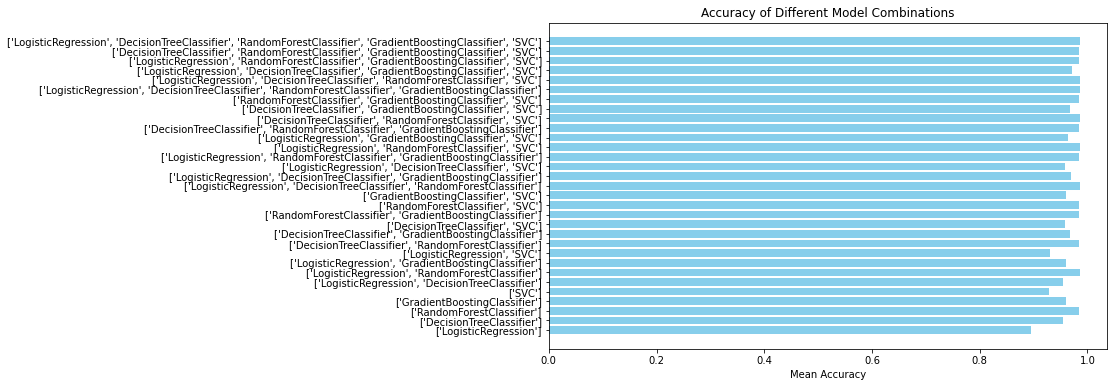

In [22]:
results_df = pd.DataFrame(results).astype({
    'Bias^2': 'float64',
    'Variance': 'float64',
    'Bias^2 + Variance': 'float64',
    'Mean Accuracy': 'float64'
})

#plotting accuracy
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model Combination'], results_df['Mean Accuracy'], color='skyblue')
plt.xlabel('Mean Accuracy')
plt.title('Accuracy of Different Model Combinations')
plt.show()

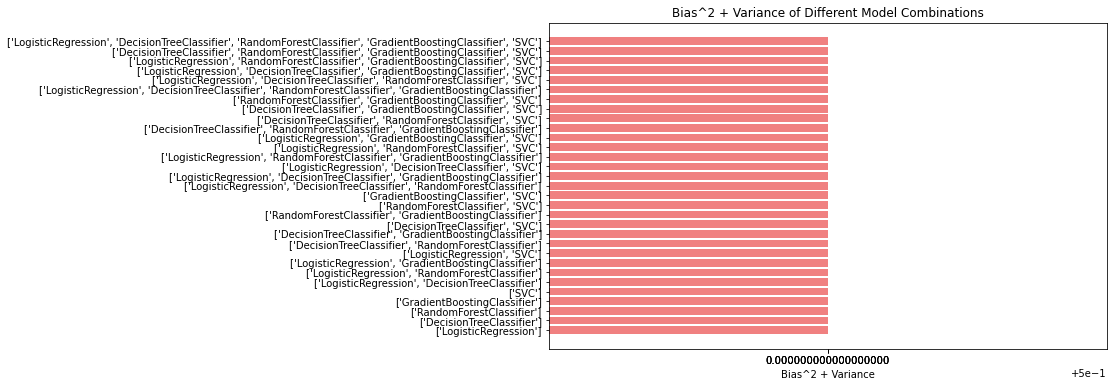

In [23]:
# Plotting Bias^2 + Variance
plt.figure(figsize=(10, 6))
bars = plt.barh(results_df['Model Combination'], results_df['Bias^2 + Variance'], color='lightcoral')

# Access the current axis and set the limits directly
ax = plt.gca()  # Get the current axis
ax.set_xlim(0.4999999999999998, 0.5000000000000001)

# Set tick marks at the start, middle, and end of the range
plt.xticks([0.4999999999999998, 0.5, 0.5000000000000001])

plt.xlabel('Bias^2 + Variance')
plt.title('Bias^2 + Variance of Different Model Combinations')
plt.show()

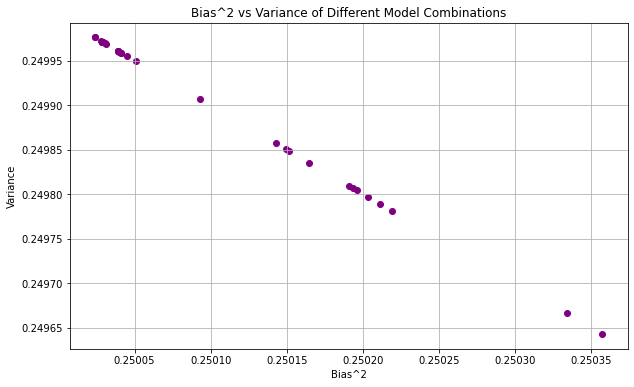

In [24]:
#plotting bias^2 vs variance
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Bias^2'], results_df['Variance'], color='purple')
plt.xlabel('Bias^2')
plt.ylabel('Variance')
plt.title('Bias^2 vs Variance of Different Model Combinations')
plt.grid(True)
plt.show()